# Computing Allan variance and noise parameters from it

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, fixed

In [2]:
from allan_variance import allan_variance, params_from_avar

In [3]:
%matplotlib inline

First generate a model signal containing additive white noise, random walk and deterministic ramp:

In [4]:
def generate_signal(n, dt, q_white, q_walk, q_ramp, random_state=0):
    rng = np.random.RandomState(random_state)
    white = q_white * rng.randn(n) * dt ** 0.5
    walk = q_walk * dt ** 0.5 * np.cumsum(rng.randn(n))    
    ramp = q_ramp * dt * np.arange(n)
    return white + walk * dt + ramp * dt

In [5]:
dt = 1e-2
n = int(10e5)

Plot the signal using interact

In [8]:
def f(n, dt, white, walk, ramp):
    x = generate_signal(n, dt, white, walk, ramp)
    plt.plot(x)
    return x

w = interactive(f, n=fixed(n), dt=fixed(dt),
                white=(0, 1, 0.1), walk=(0, 1, 0.1), ramp=(-0.1, 0.1, 0.01),
                continuous_update=False)
w 

interactive(children=(FloatSlider(value=0.0, description='white', max=1.0), FloatSlider(value=0.0, description…

In [9]:
w.kwargs

{'n': 1000000, 'dt': 0.01, 'white': 0.5, 'walk': 0.8, 'ramp': 0.04}

Now compute AV curve using `allan_variance` function:

In [10]:
x = w.result
tau, av = allan_variance(x, dt)

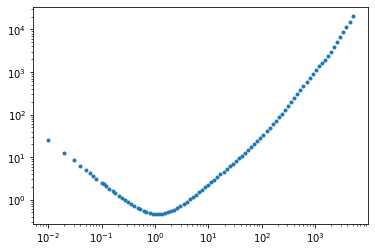

In [11]:
%matplotlib inline
plt.loglog(tau, av, '.')

We clearly see a part with a slope of -1 corresponding to the white noise. At large averaging times AV is dominated by the linear ramp (slope is +2). The random walk part is located between them.

We can automatically estimate the noise magnitudes using `params_from_avar` function:

In [12]:
params, av_pred = params_from_avar(tau, av, output_type='dict')

In [13]:
params

OrderedDict([('quantization', 0.0040435073119749285),
             ('white', 0.49778100446479945),
             ('flicker', 0.0),
             ('walk', 0.8155163266684443),
             ('ramp', 0.03919704354309536)])

We see that the estimated parameters are close to the model values. And the parameters of the effects which weren't included in the model (quantization and flicker noise) are zero or very close to it.

Finally we display the estimated AV curve along with computed actual values:

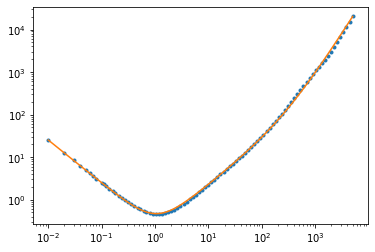

In [14]:
plt.loglog(tau, av, '.')
plt.loglog(tau, av_pred)